# Housing Price Prediction Model

Steps performed in this project:

- Exploratory Data Analysis
    - Missing Values
    - Numerical Variables
    - Temporal Variables
    - Discrete Variables
    - Continuous Variables
    - Categorical Variables
    - Correlation Matrix
- Feature Engineering
    - Log Transformation
    - One Hot Encoding
    - Handle Missing Values
- Model Building and Evaluation
    - Feature Scaling (Standard Scaler)
    - Linear Regression
    - Random Forest
    - Hyperparameter Tuned Model
- Result


# Exploratory Data Analysis

In [1]:
# Importing the basic libraries
import pandas as pd               # linear algebra
import seaborn as sns             # data visualization
import numpy as np                # data processing
import matplotlib.pyplot as plt   # data visualization
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# Model creation libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Read the input file
train=pd.read_csv('Housing_Prices.csv')
df_raw=train.copy()
train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [3]:
# Check the datatype and non-null values in each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
# Check data size
train.shape

(13580, 21)

In [5]:
# Check the name of all the columns
train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# Check min and max values of numeric variables
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


### Missing Values

In [8]:
# Create a temporary list comprehension of all features in which values are missing

features_with_na=[features for features in train.columns if train[features].isnull().sum()>0]

# Print % of missing values
for features in features_with_na:
    print(" {} has {} missing values and {}% missing values".
          format(features, train[features].isnull().sum(), np.round(train[features].isnull().mean()*100,3)))

 Car has 62 missing values and 0.457% missing values
 BuildingArea has 6450 missing values and 47.496% missing values
 YearBuilt has 5375 missing values and 39.58% missing values
 CouncilArea has 1369 missing values and 10.081% missing values


### Numeric Variables

In [9]:
# Create a list comprehension of numeric variables
# Character and string variables are object type

numeric_feature=[features for features in train.columns if train[features].dtype !='O']

print("Number of Numeric variables are", len(numeric_feature))
train[numeric_feature].head()

Number of Numeric variables are 13


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,4019
1,2,1035000,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,4019
2,3,1465000,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,4019
3,3,850000,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,4019
4,4,1600000,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,4019


### Temporal Variables

In [10]:
# These are date time variables 
temporal_feature=[features for features in numeric_feature if 'Year'in features or 'Date' in features]
print("Number of Temporal variables are", len(temporal_feature))
train[temporal_feature].head()

Number of Temporal variables are 1


,YearBuilt
0,NaN
1,1900.0
2,1900.0
3,NaN
4,2014.0


Text(0.5, 1.0, 'House Price vs YearBuilt')

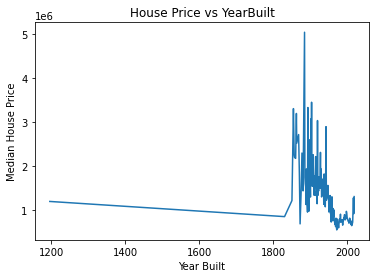

In [11]:
#Check whether there is a relation between year the house is built and the price

train.groupby('YearBuilt')['Price'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title("House Price vs YearBuilt")

### Discrete Variables

In [12]:
#I am considering all variables with less than 25 unique values as discrete varaibles

discrete_feature=[features for features in numeric_feature if len(train[features].unique()) <25 and 
                  features not in temporal_feature]

print ("Number of Discrete Variables are", len(discrete_feature))
train[discrete_feature].head()

Number of Discrete Variables are 4


,Rooms,Bedroom2,Bathroom,Car
0,2,2,1,1.0
1,2,2,1,0.0
2,3,3,2,0.0
3,3,3,2,1.0
4,4,3,1,2.0


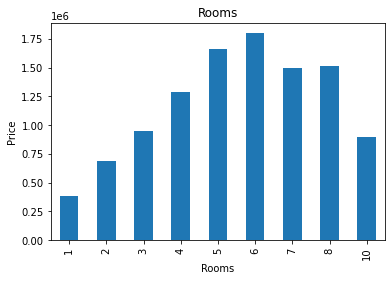

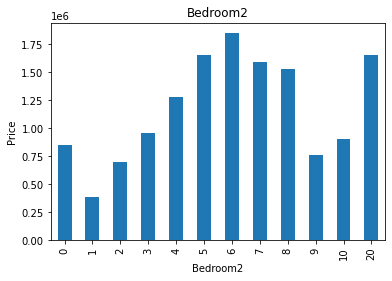

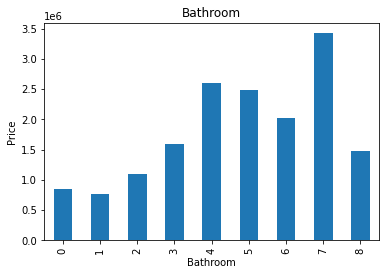

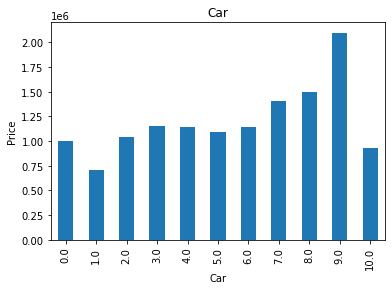

In [13]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

### Continuous Variables

In [14]:
continuous_feature=[feature for feature in numeric_feature if feature not in discrete_feature + temporal_feature]
print("Number of Continuous Variables are", len(continuous_feature))
train[continuous_feature].head()

Number of Continuous Variables are 8


,Price,Distance,Postcode,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
0,1480000,2.5,3067,202,NaN,-37.7996,144.9984,4019
1,1035000,2.5,3067,156,79.0,-37.8079,144.9934,4019
2,1465000,2.5,3067,134,150.0,-37.8093,144.9944,4019
3,850000,2.5,3067,94,NaN,-37.7969,144.9969,4019
4,1600000,2.5,3067,120,142.0,-37.8072,144.9941,4019


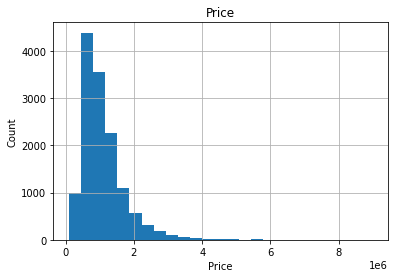

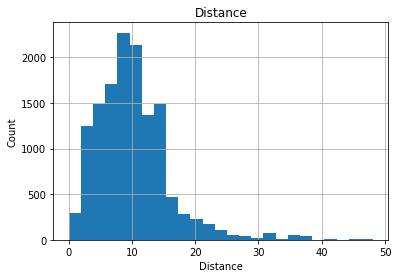

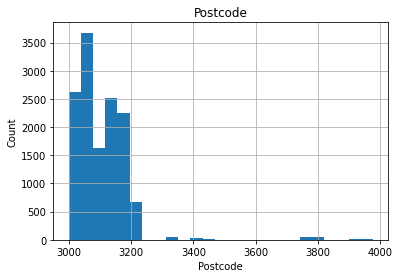

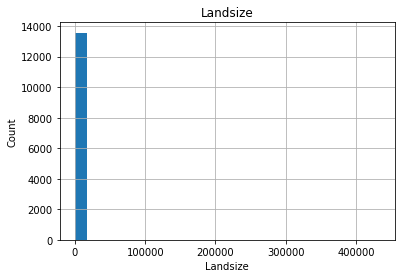

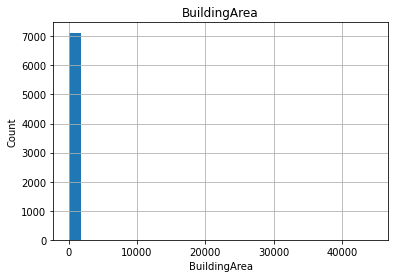

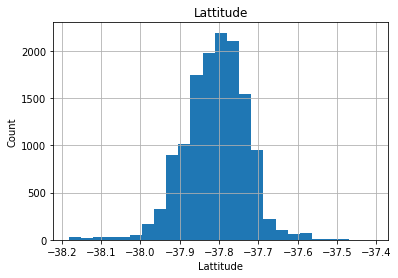

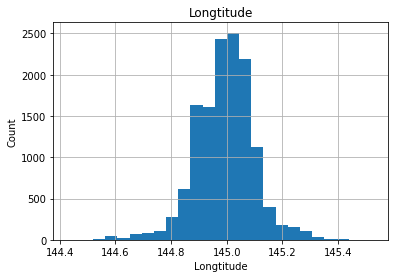

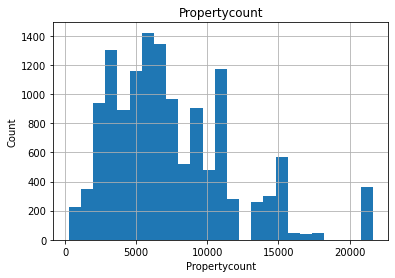

In [15]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical Variables

In [17]:
categorical_feature=[feature for feature in train.columns if train[feature].dtypes=='O']
print("Number of Categorical Variables are ", len(categorical_feature))
train[categorical_feature].head()

Number of Categorical Variables are  8


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,03-12-2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,04-02-2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,04-03-2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,04-03-2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,04-06-2016,Yarra,Northern Metropolitan


In [18]:
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is Suburb and number of categories are 314
The feature is Address and number of categories are 13378
The feature is Type and number of categories are 3
The feature is Method and number of categories are 5
The feature is SellerG and number of categories are 268
The feature is Date and number of categories are 58
The feature is CouncilArea and number of categories are 34
The feature is Regionname and number of categories are 8


In [19]:
drop_list = ['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']
data = train.drop(drop_list, axis=1)

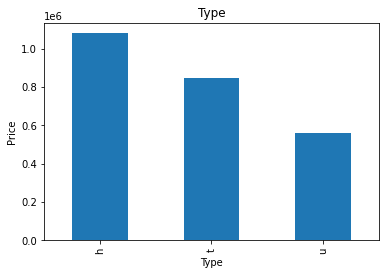

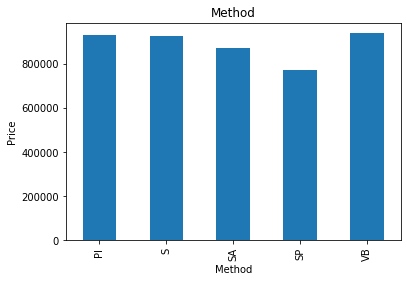

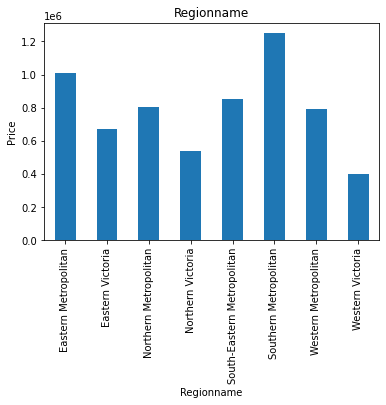

In [20]:
categorical_feature=[feature for feature in data.columns if data[feature].dtypes=='O']

for feature in categorical_feature:
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

### Correlation Analysis

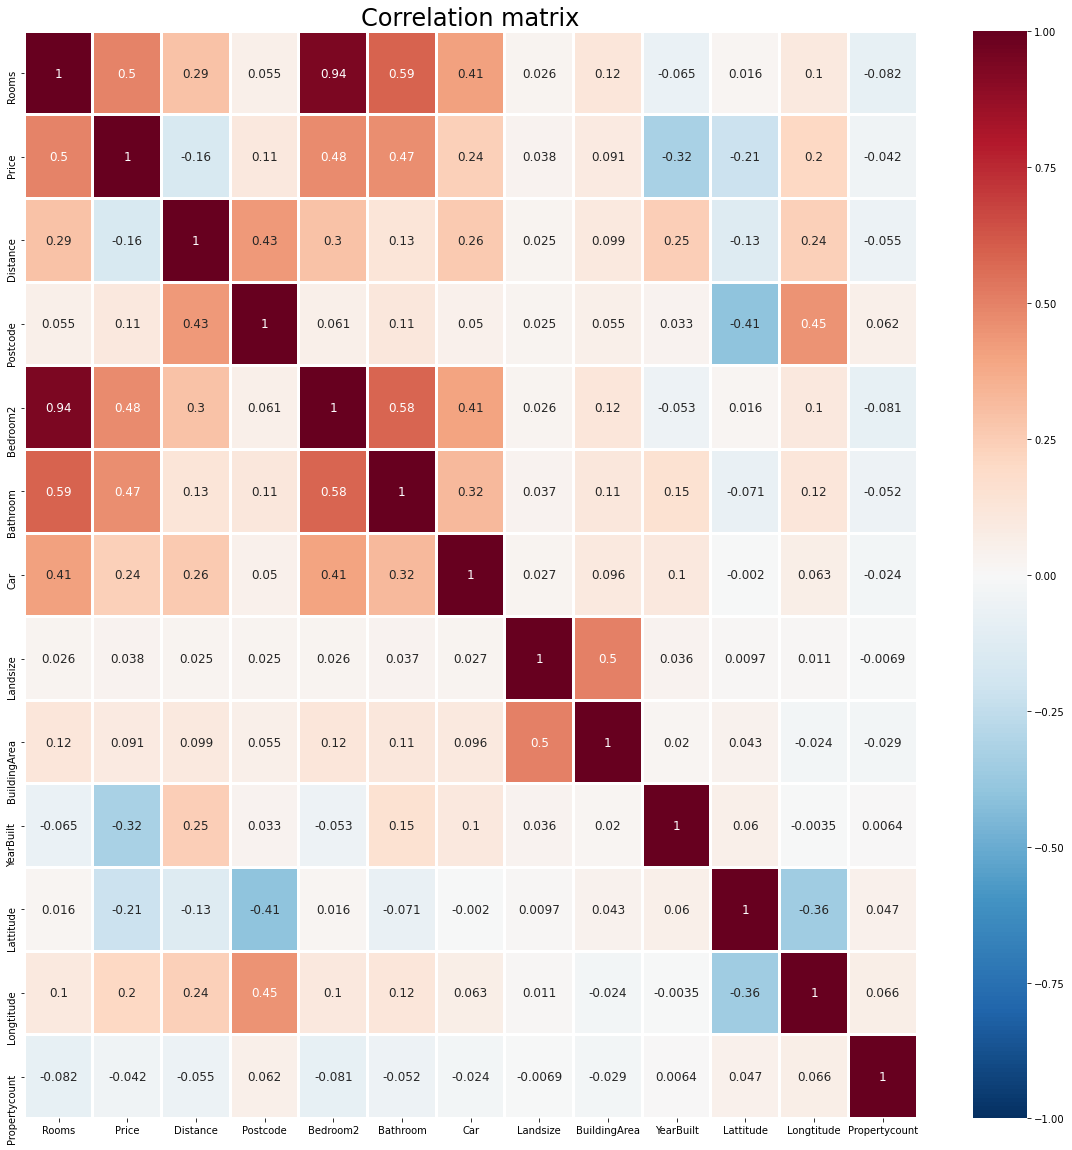

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, linewidth=2, annot_kws={"fontsize":12},
            square=False, cbar=True).set_title('Correlation matrix', fontsize=24, y=1.02);

# Feature Engineering

### Log Transformation

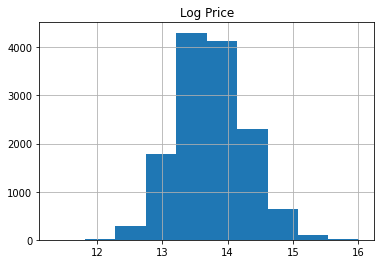

In [22]:
# log transformation on Price variable
df_raw['log_Price'] = np.log1p(df_raw.Price.dropna())

log_price_mean = df_raw['log_Price'].mean()90
log_price_std = df_raw['log_Price'].std()

df_raw.log_Price.hist()
plt.title('Log Price');

### One hot Encoding

In [23]:
# The features 'Suburb', 'Address', and 'SellerG' have too many unique values to be helpful. 
# So I will just drop those columns.

drop_list = ['Suburb', 'Address', 'SellerG', 'CouncilArea']
df_raw = df_raw.drop(drop_list, axis=1)

df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,log_Price
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019,14.207553
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019,13.849913
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019,14.197366
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019,13.652993
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019,14.285515


In [24]:
# There are no Nan values in the remaining categorical variables
df_raw[['Type', 'Method', 'Regionname']].isna().sum()

Type          0
Method        0
Regionname    0
dtype: int64

In [25]:
# Applying one-hot encoding on 'Type' variable
cat_encoder = OneHotEncoder(sparse=False)

df_raw_type_reshaped = df_raw['Type'].values.reshape(-1,1)
df_raw_type_1hot = cat_encoder.fit_transform(df_raw_type_reshaped)

df_raw_type_1hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [26]:
categories = cat_encoder.categories_
df_raw_type_1hot = pd.DataFrame(df_raw_type_1hot, columns=categories)

df_raw_type_1hot

,h,t,u
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13575,1.0,0.0,0.0
13576,1.0,0.0,0.0
13577,1.0,0.0,0.0
13578,1.0,0.0,0.0


In [27]:
# Concatinating One hot DataFrame and raw dataframe

df_raw = df_raw.reset_index().drop('index', axis=1)
df_raw = pd.concat([df_raw, df_raw_type_1hot], axis=1)
df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,log_Price,"(h,)","(t,)","(u,)"
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019,14.207553,1.0,0.0,0.0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019,13.849913,1.0,0.0,0.0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019,14.197366,1.0,0.0,0.0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019,13.652993,1.0,0.0,0.0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019,14.285515,1.0,0.0,0.0


In [28]:
# Applying one-hot encoding on 'Method' variable

df_raw_meth_reshaped = df_raw['Method'].values.reshape(-1,1)
df_raw_meth_1hot = cat_encoder.fit_transform(df_raw_meth_reshaped)

categories = cat_encoder.categories_
df_raw_meth_1hot = pd.DataFrame(df_raw_meth_1hot, columns=categories)

df_raw = pd.concat([df_raw, df_raw_meth_1hot], axis=1)
df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,log_Price,"(h,)","(t,)","(u,)","(PI,)","(S,)","(SA,)","(SP,)","(VB,)"
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019,14.207553,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019,13.849913,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019,14.197366,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019,13.652993,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019,14.285515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# Applying one-hot encoding on 'Regionname' variable

df_raw_reg_reshaped = df_raw['Regionname'].values.reshape(-1,1)
df_raw_reg_1hot = cat_encoder.fit_transform(df_raw_reg_reshaped)

categories = cat_encoder.categories_
df_raw_reg_1hot = pd.DataFrame(df_raw_reg_1hot, columns=categories)

df_raw = pd.concat([df_raw, df_raw_reg_1hot], axis=1)
df_raw.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,log_Price,"(h,)","(t,)","(u,)","(PI,)","(S,)","(SA,)","(SP,)","(VB,)","(Eastern Metropolitan,)","(Eastern Victoria,)","(Northern Metropolitan,)","(Northern Victoria,)","(South-Eastern Metropolitan,)","(Southern Metropolitan,)","(Western Metropolitan,)","(Western Victoria,)"
0,2,h,1480000,S,03-12-2016,2.5,3067,2,1,1.0,202,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019,14.207553,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,h,1035000,S,04-02-2016,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019,13.849913,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,h,1465000,SP,04-03-2017,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019,14.197366,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,h,850000,PI,04-03-2017,2.5,3067,3,2,1.0,94,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019,13.652993,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,h,1600000,VB,04-06-2016,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019,14.285515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Handle Missing Values

In [30]:
# Remove all the features with dtype == object
objects = []

df_na = df_raw.dropna(subset=['Price', 'log_Price'], axis=0)

for i in df_raw.columns.values:
    if df_raw[i].dtype == 'O':
        objects.append(str(i))

df_na = df_na.drop(objects, axis=1)

df_na.isna().sum()

Rooms                               0
Price                               0
Distance                            0
Postcode                            0
Bedroom2                            0
Bathroom                            0
Car                                62
Landsize                            0
BuildingArea                     6450
YearBuilt                        5375
Lattitude                           0
Longtitude                          0
Propertycount                       0
log_Price                           0
(h,)                                0
(t,)                                0
(u,)                                0
(PI,)                               0
(S,)                                0
(SA,)                               0
(SP,)                               0
(VB,)                               0
(Eastern Metropolitan,)             0
(Eastern Victoria,)                 0
(Northern Metropolitan,)            0
(Northern Victoria,)                0
(South-Easte

In [31]:
cols = ['Bedroom2', 'Bathroom', 'Car','Landsize','BuildingArea', 'YearBuilt']
df_num = df_na[cols]
df_num.isna().sum()

Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
dtype: int64

In [32]:
# Now I will check for Numerical variables that contains missing values

numerical_with_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{} has {} missing values or {}% missing values".format(feature, train[feature].isnull().sum(), np.round(train[feature].isnull().mean()*100,4)))

Car has 62 missing values or 0.4566% missing values
BuildingArea has 6450 missing values or 47.4963% missing values
YearBuilt has 5375 missing values or 39.5803% missing values


In [33]:
# Replacing the numerical Missing Values with median as there are outliers present

for feature in numerical_with_nan:
    median_value=df_num[feature].median()
    df_num[feature].fillna(median_value,inplace=True)
    
df_num.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64

In [34]:
df_num.head()

,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2,1,1.0,202,126.0,1970.0
1,2,1,0.0,156,79.0,1900.0
2,3,2,0.0,134,150.0,1900.0
3,3,2,1.0,94,126.0,1970.0
4,3,1,2.0,120,142.0,2014.0


In [35]:
# Concatinating filled NaNs with the rest of our data

df_na = pd.concat([df_na.drop(cols, axis=1), df_num], axis=1)
df_na.head()
df_na.isna().sum()

Rooms                            0
Price                            0
Distance                         0
Postcode                         0
Lattitude                        0
Longtitude                       0
Propertycount                    0
log_Price                        0
(h,)                             0
(t,)                             0
(u,)                             0
(PI,)                            0
(S,)                             0
(SA,)                            0
(SP,)                            0
(VB,)                            0
(Eastern Metropolitan,)          0
(Eastern Victoria,)              0
(Northern Metropolitan,)         0
(Northern Victoria,)             0
(South-Eastern Metropolitan,)    0
(Southern Metropolitan,)         0
(Western Metropolitan,)          0
(Western Victoria,)              0
Bedroom2                         0
Bathroom                         0
Car                              0
Landsize                         0
BuildingArea        

In [36]:
# Clean up columns from 1hot encoding
col_list = ['Rooms', 'Price', 'Distance', 'Postcode', 'Lattitude',
            'Longtitude', 'Propertycount', 'log_Price', 'h', 't', 'u',
            'PI', 'S', 'SA', 'SP',
            'VB', 'Eastern_Metropolitan', 'Eastern_Victoria',
            'Northern_Metropolitan', 'Northern_Victoria',
            'South_Eastern_Metropolitan', 'Southern_Metropolitan',
            'Western_Metropolitan', 'Western_Victoria', 'Bedroom2',
            'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
df_na.columns = col_list

In [37]:
# Convert Date feature to datetime

df_na['Date'] = df_raw['Date']
df_na['Date'].head()

df_na['Date'] = pd.to_datetime(df_na['Date'], errors='raise', dayfirst=1)
df_na['Date'].head()

0   2016-12-03
1   2016-02-04
2   2017-03-04
3   2017-03-04
4   2016-06-04
Name: Date, dtype: datetime64[ns]

In [38]:
# Store the engineered data into new dataset
df_clean = df_na

In [39]:
# Check data again
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13579
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Rooms                       13580 non-null  int64         
 1   Price                       13580 non-null  int64         
 2   Distance                    13580 non-null  float64       
 3   Postcode                    13580 non-null  int64         
 4   Lattitude                   13580 non-null  float64       
 5   Longtitude                  13580 non-null  float64       
 6   Propertycount               13580 non-null  int64         
 7   log_Price                   13580 non-null  float64       
 8   h                           13580 non-null  float64       
 9   t                           13580 non-null  float64       
 10  u                           13580 non-null  float64       
 11  PI                          13580 non-null  float64   

# Model Building

In [40]:
# define data and target variables

drop_list = ['Price', 'log_Price', 'Date']
data = df_clean.drop(drop_list, axis=1)
target = df_clean['log_Price']

In [41]:
# Train test data split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

### Data Transformation

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

### Linear Regression

In [43]:
# Linear Regression model without scaled data
OLS = LinearRegression()
OLS.fit(X_train, y_train)

y_pred = OLS.predict(X_test)

print('Linear Regression')
print('\nR-squared training set:')
print(OLS.score(X_train, y_train))

print('\nR-squared test set:')
print(OLS.score(X_test, y_test))

Linear Regression

R-squared training set:
0.7202528607618356

R-squared test set:
0.7016474843700429


In [44]:
# Linear Regression model with scaled data
OLS_scaled = LinearRegression()
OLS_scaled.fit(X_train_scaled, y_train)
y_pred = OLS_scaled.predict(X_test_scaled)

print('Scaled Linear Regression')
print('\nR-squared training set:')
print(OLS_scaled.score(X_train_scaled, y_train))

print('\nR-squared test set:')
print(OLS_scaled.score(X_test_scaled, y_test))

Scaled Linear Regression

R-squared training set:
0.7202525124561749

R-squared test set:
0.7016370875865354


### Random Forest

In [45]:
# Random Forest model without scaled data
RF = RandomForestRegressor(n_estimators=10)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print('Random Forest Regressor')
print('\nR-squared training set:')
print(RF.score(X_train, y_train))

print('\nR-squared test set:')
print(RF.score(X_test, y_test))

Random Forest Regressor

R-squared training set:
0.9732168124397975

R-squared test set:
0.8519625665653334


In [46]:
# Random Forest model with scaled data
RF_scaled = RandomForestRegressor(n_estimators=10)
RF_scaled.fit(X_train_scaled, y_train)
y_pred = RF_scaled.predict(X_test_scaled)

print('Scaled Random Forest Regressor')
print('\nR-squared training set:')
print(RF_scaled.score(X_train_scaled, y_train))

print('\nR-squared test set:')
print(RF_scaled.score(X_test_scaled, y_test))

Scaled Random Forest Regressor

R-squared training set:
0.9730045733231826

R-squared test set:
0.8521016942442514


### Hyperparameter Optimized Random Forest Model

In [47]:
forest=RandomForestRegressor()

In [48]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [40, 50, 55],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=4, n_jobs=-1, verbose=2)

In [57]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   47.0s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [58]:
grid_search.best_params_

{'max_depth': 40}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
model_rf= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
y_pred_rf=model_rf.predict(X_test)

In [63]:
score_rf=r2_score(y_test,y_pred_rf)
score_rf

0.8699649961358498

### Result

- Using Linear Regression with scaled input, house prices can be predicted with 70.16% accuracy.
- Using Random Forest model with scaled input, house prices can be predicted with 85.21% accuracy.
- By performing hyperparameter optimizations, Random Forest model perfromnace has been improved to 86.99% accuracy.